In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/two_population


In [22]:
simulation_subfolder = "three_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,21)] #regulary space with 4 point between each order of magnitude
D1 = 0.01
D2 = 0.1
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
for L in Ls:
    distance_summary_file = f'all_distance/L_{L}.dat'
    distance_summary_file = os.path.join(simulation_subfolder,distance_summary_file)
    distances  = np.loadtxt(distance_summary_file)
    for distance in distances:
        all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        all_distances2 = np.append(all_distances2,[[L,distance[1]]],axis = 0)
    sigma_within1 = np.std(distances[1:,0],ddof=1)
    sigma_outside1 = np.sqrt(np.sum((distances[1:,0]-2*D2)**2)/len(distances[1:,0]))
    sigma1 = np.append(sigma1,[[L,sigma_within1, sigma_outside1]],axis = 0)
    sigma_within2 = np.std(distances[1:,1],ddof=1)
    sigma_outside2 = np.sqrt(np.sum((distances[1:,1]-2*D1)**2)/len(distances[1:,1]))
    sigma2 = np.append(sigma2,[[L,sigma_within2, sigma_outside2]],axis = 0)


/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: loadtxt: Empty input file: "/Users/fmichaud/PycharmProjects/medeas_simulations/three_population/all_distance/L_316.dat"
  from ipykernel import kernelapp as app


IndexError: too many indices for array

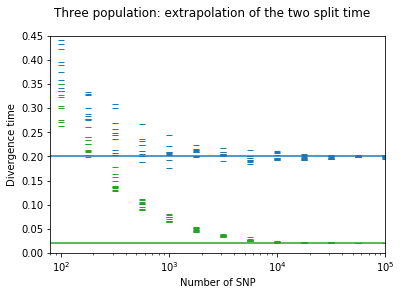

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.suptitle("Three population: extrapolation of the two split time")
plt.xlabel("Number of SNP")
plt.ylabel("Divergence time")
plt.axhline(y=0.2,c=colors[0])
plt.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
plt.xlim((80,100000))
plt.ylim((0,0.45))
plt.axhline(y=0.02,c=colors[2])
plt.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_",c=colors[2])
plt.savefig(os.path.join(simulation_subfolder,"splitting_time_three_pop.pdf"))

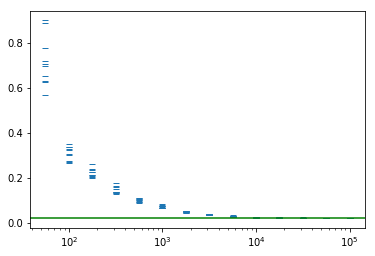

In [12]:
plt.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
plt.axhline(y=0.02,c="g")

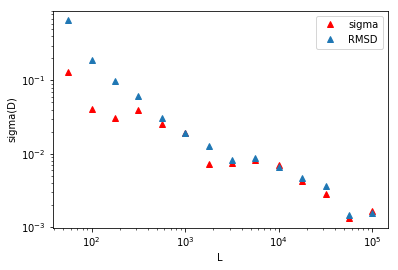

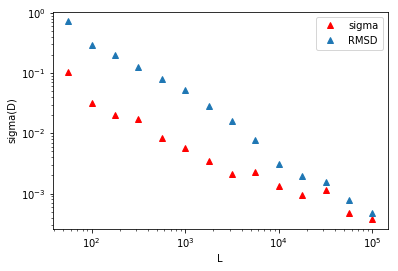

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma1[1:,0],sigma1[1:,1],"r^",label="sigma")
ax.loglog(sigma1[1:,0],sigma1[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma2[1:,0],sigma2[1:,1],"r^",label="sigma")
ax.loglog(sigma2[1:,0],sigma2[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[1.54580281e-01 2.22388181e-02 1.38625037e-02 1.37478044e-02
 1.36394042e-02 1.35611270e-02 1.35330407e-02 1.34595763e-02
 1.34451394e-02 1.33615516e-02 1.32839077e-02 1.32355829e-02
 1.31589719e-02 1.30901259e-02 1.30702385e-02 1.30270840e-02
 1.29719680e-02 1.29527947e-02 1.29335488e-02 1.28948485e-02
 1.28321975e-02 1.27622562e-02 1.27164716e-02 1.26350723e-02
 1.25505057e-02 1.24688996e-02 1.24090146e-02 1.23956214e-02
 1.23181594e-02 1.23113142e-02 1.22486811e-02 1.22203621e-02
 1.21930971e-02 1.21684058e-02 1.20892989e-02 1.20405642e-02
 1.19739934e-02 1.19490617e-02 1.19134750e-02 1.18448743e-02
 1.17646050e-02 1.17152223e-02 1.16962159e-02 1.16479705e-02
 1.15957723e-02 1.15617876e-02 1.15448530e-02 1.15008007e-02
 1.14450746e-02 1.13407216e-02 1.13022609e-02 1.12393847e-02
 1.11838203e-02 1.11224755e-02 1.10600376e-02 1.10084613e-02
 1.08536465e-02 1.07690939e-02 1.06737041e-02 6.02784256e-17]


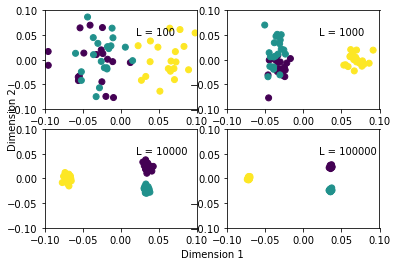

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
for iL, L in enumerate([100,1000,10000,100000]):
    location_vector = os.path.join (simulation_subfolder, f'convergence_speed/L_{L}/MDS_eigensystem/p1.vecs.data')
    val,vec = pickle.load(open(location_vector,"rb"))
    ax = fig.add_subplot(2,2,iL+1)
    scale = 0.1
    ax.set_xlim([-scale,scale])
    ax.set_ylim([-scale,scale])
    ax.text(0.02,scale*0.5,f'L = {L}')
    order = np.argsort(-val)
    ax.scatter(np.sqrt(val[order[0]])*vec[:,order[0]],np.sqrt(val[order[1]])*vec[:,order[1]],c = np.concatenate((np.full(20,1),np.full(20,2),np.full(20,3))))
fig.show()
print(val[order])
fig.savefig(os.path.join(simulation_subfolder,"PCA.pdf"))


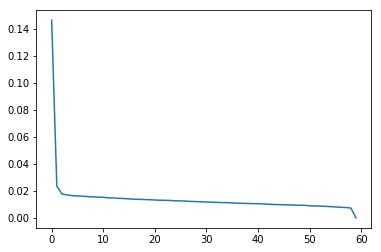

In [81]:
L=10000
location_vector = os.path.join (simulation_subfolder, f'convergence_speed/L_{L}/pp.1.vecs.data')
val,vec = pickle.load(open(location_vector,"rb"))

plt.plot(val[order])

In [103]:
simulation_subfolder = "three_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,12)] #regulary space with 4 point between each order of magnitude
D1 = 0.01
D2 = 0.1
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
for L in Ls:
    distance_summary_file = f'all_distance/L_{L}.dat'
    distance_summary_file = os.path.join(simulation_subfolder,distance_summary_file)
    distances  = np.loadtxt(distance_summary_file)
    for distance in distances:
        all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        all_distances2 = np.append(all_distances2,[[L,distance[1]]],axis = 0)
    sigma_within1 = np.std(distances[1:,0],ddof=1)
    sigma_outside1 = np.sqrt(np.sum((distances[1:,0]-2*D2)**2)/len(distances[1:,0]))
    sigma1 = np.append(sigma1,[[L,sigma_within1, sigma_outside1]],axis = 0)
    sigma_within2 = np.std(distances[1:,1],ddof=1)
    sigma_outside2 = np.sqrt(np.sum((distances[1:,1]-2*D1)**2)/len(distances[1:,1]))
    sigma2 = np.append(sigma2,[[L,sigma_within2, sigma_outside2]],axis = 0)
    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.suptitle("Three population: extrapolation of the two split time")
plt.xlabel("Number of SNP")
plt.ylabel("Divergence time")
plt.axhline(y=0.2,c=colors[0])
plt.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
plt.xlim((80,100000))
plt.ylim((0,0.45))
plt.axhline(y=0.02,c=colors[2])
plt.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_",c=colors[2])
plt.savefig(os.path.join(simulation_subfolder,"splitting_time_three_pop.pdf"))

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: loadtxt: Empty input file: "/Users/fmichaud/PycharmProjects/medeas_simulations/three_population/all_distance/L_562.dat"
  from ipykernel import kernelapp as app


IndexError: too many indices for array

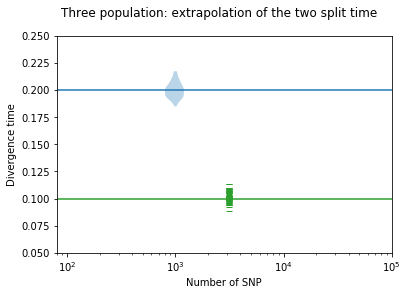

In [133]:
simulation_subfolder = "three_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(14,15)] #regulary space with 4 point between each order of magnitude
D1 = 0.01
D2 = 0.1
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
for L in Ls:
    distance_summary_file = f'all_distance_bis/L_{L}.dat'
    distance_summary_file = os.path.join(simulation_subfolder,distance_summary_file)
    distances  = np.loadtxt(distance_summary_file)
    for distance in distances:
        all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        all_distances2 = np.append(all_distances2,[[L,distance[1]]],axis = 0)
    sigma_within1 = np.std(distances[1:,0],ddof=1)
    sigma_outside1 = np.sqrt(np.sum((distances[1:,0]-2*D2)**2)/len(distances[1:,0]))
    sigma1 = np.append(sigma1,[[L,sigma_within1, sigma_outside1]],axis = 0)
    sigma_within2 = np.std(distances[1:,1],ddof=1)
    sigma_outside2 = np.sqrt(np.sum((distances[1:,1]-2*D1)**2)/len(distances[1:,1]))
    sigma2 = np.append(sigma2,[[L,sigma_within2, sigma_outside2]],axis = 0)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.suptitle("Three population: extrapolation of the two split time")
plt.xlabel("Number of SNP")
plt.ylabel("Divergence time")
plt.axhline(y=0.2,c=colors[0])
plt.violinplot(all_distances1[1:,1],positions=[1000],widths=400,showextrema=False)
plt.xlim((80,100000))
plt.ylim((0.05,0.25))
plt.axhline(y=0.1,c=colors[2])
plt.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_",c=colors[2])
plt.savefig(os.path.join(simulation_subfolder,"splitting_time_three_pop.pdf"))

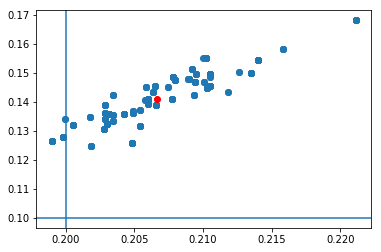

In [95]:
simulation_subfolder = "three_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,21)] #regulary space with 4 point between each order of magnitude
D1 = 0.05
D2 = 0.1
all_distances1= [[0,0]]
L = 31622
distance_file = f'convergence_speed_bis/L_{L}/all_extrapolated_distances.txt'
distance_file = os.path.join(simulation_subfolder,distance_file)
distances  = np.loadtxt(distance_file)

plt.plot(distances[:,0],distances[:,1],'o')
plt.plot(np.mean(distances[:,0]),np.mean(distances[:,1]),'ro')

plt.axvline(0.2)
plt.axhline(0.1)

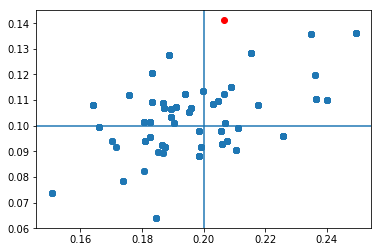

In [96]:
simulation_subfolder = "three_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,21)] #regulary space with 4 point between each order of magnitude
D1 = 0.05
D2 = 0.1
all_distances1= [[0,0]]
L = 1000
distance_file = f'convergence_speed_bis/L_{L}/all_extrapolated_distances.txt'
distance_file = os.path.join(simulation_subfolder,distance_file)
plt.plot(np.mean(distances[:,0]),np.mean(distances[:,1]),'ro')
distances  = np.loadtxt(distance_file)

plt.plot(distances[:,0],distances[:,1],'o')
plt.axvline(0.2)
plt.axhline(0.1)